# 1. Packages

In [2]:
import time
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0,4.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'grey'

np.random.seed(1)

In [6]:
%run dnn_utils3.ipynb

# 2. Dataset

We will use "Cat vs non-cat" dataset from kaggle

Our dataset containing -: 1. Training set of m_train images labelled as cat(1)
                            or non-cat(0)

                           2. Test set of m_test images labelled as cat and non-cat
                           Each image is shape (num_px,num_px,3)
                           where 3 is for the 3 channel (RGB)

In [7]:
train_x_orig, train_y, test_x_orig, test_y, classes = load_data()

the following code will show you an image in the dataset

y = 0 It's a  non-cat picture


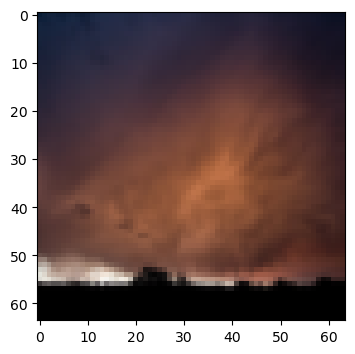

In [16]:
# Example of a picture
index = 208
plt.imshow(train_x_orig[index])
print('y =',train_y[0,index],"It's a ",classes[train_y[0,index]].decode('utf-8'),'picture')

In [20]:
# Explore the datase
train_x_orig.shape
print('Number of training example is :',train_x_orig.shape[0])
print('Number of testing example is:',test_x_orig.shape[0])
print('Each image is of size :',train_x_orig.shape[1:])
print('train_y shape :',train_y.shape)
print('test_x_orig shape :',test_x_orig.shape)
print('test_y shape :',test_y.shape)

Number of training example is : 209
Number of testing example is: 50
Each image is of size : (64, 64, 3)
train_y shape : (1, 209)
test_x_orig shape : (50, 64, 64, 3)
test_y shape : (1, 50)


In [23]:
# Reshape the training and test example
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0],-1).T
test_x_flatten  = test_x_orig.reshape(test_x_orig.shape[0],-1).T

# Standardize data to have feature values between 0 and 1

train_x = train_x_flatten/255
test_x = test_x_flatten/255

print('train_x shape :',train_x.shape)
print('test_x shape :',test_x.shape)


train_x shape : (12288, 209)
test_x shape : (12288, 50)


# 3. Architecture of Model

 Its time to build a deep neural network to distinguish cat image from non-cat image

we build two different Models

1. A 2-layer neural network
2. And L-layer deep neural network

After then computing the performance of these models, and also try out different values for L

# 3.1- 2- layer neural network

Question -- Use the helper function implement 

In [24]:
## Constants defining the model
n_x = 12288
n_y = 1
n_h = 7
layers_dims = (n_x, n_h, n_y)

In [32]:
# Graded Function: two_layer_model
def two_layer_model(X,Y,layers_dims,learning_rate = 0.075,num_iteration =3000, print_cost = False):
    """
    Implement a two-layer neural network: Linear -> Relu -> Linear -> Sigmoid.

    Arguments:
    X -- input data, of shape (n_x, number of example)
    Y -- true 'label' vector (conatining 1 if cat, 0 if non-cat)
    layers_dims -- dimension of the layer (n_x,n_h,n_y)
    num_iteration -- number of iteration of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- if set to true, this will print the costb every 100 iteration

    Returns:
    parameters -- a dictionary containing W1,W2,b1,b2
    """
    np.random.seed(1)
    grads = {}
    costs = []
    m = X.shape[1]
    (n_x, n_h, n_y) = layers_dims
    # Initialize parameters dictionary, by calling one of the functions previously implemented
    parameters = initialize_parameters(n_x, n_h, n_y)
    # End Code Here

    ## get W1,b1,W2,b2 from dictionary parameters.
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    # Loop (gradient descent)
    for i in range(0,num_iteration):
        A1,cache1 = linear_activation_forward(X,W1,b1,activation = 'relu')
        A2,cache2 = linear_activation_forward(A1,W2,b2,activation = 'sigmoid')
        ## compute cost
        cost = compute_cost(A2,Y)
        ## initialize backward propagation
        dA2 = -(np.divide(Y,A2) - np.divide(1-Y,1-A2))
        # backward propagation'
        dA1,dW2,db2 = linear_activation_backward(dA2,cache2,activation = 'sigmoid')
        dA0,dW1,db1 = linear_activation_backward(dA1,cache1,activation = 'relu')
        grads['dW1'] = dW1
        grads['db1'] = db1
        grads['dW2'] = dW2
        grads['db2'] = db2
        # Update parameters'
        parameters = update_parameters(parameters,grads,learning_rate)
        # Retrieve W1,b1,W2,b2 from parameters'
        W1 = parameters['W1']
        b1 = parameters['b1']
        W2 = parameters['W2']
        b2 = parameters['b2']
        # print the cost every 100 training example'
        if print_cost and i % 100 == 0:
            print('Cost after iteration {}: {}'.format(i,np.squeeze(cost)))
        if print_cost and i % 100 ==0:
            costs.append(cost)
 
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iteration (per hundreds)')
    plt.title('Learning rate =' + str(learning_rate))
    plt.show()
    return parameters



Cost after iteration 0: 0.693049735659989
Cost after iteration 100: 0.6159811750972888
Cost after iteration 200: 0.6008384836529445
Cost after iteration 300: 0.41014576405028996
Cost after iteration 400: 0.4130265383457005
Cost after iteration 500: 0.6559685498329383
Cost after iteration 600: 0.33394739804974094
Cost after iteration 700: 0.45698764583366397
Cost after iteration 800: 0.3089103000830577
Cost after iteration 900: 0.27453832087682795
Cost after iteration 1000: 0.20378103362127614
Cost after iteration 1100: 0.49582458650660566
Cost after iteration 1200: 0.34149599403364217
Cost after iteration 1300: 0.3877933258539826
Cost after iteration 1400: 0.2053854302869153
Cost after iteration 1500: 0.1801454970127309
Cost after iteration 1600: 0.17412257702798853
Cost after iteration 1700: 0.339598362528564
Cost after iteration 1800: 0.3148865122586279
Cost after iteration 1900: 0.34445040635778235
Cost after iteration 2000: 0.24434336053301267
Cost after iteration 2100: 0.266766550

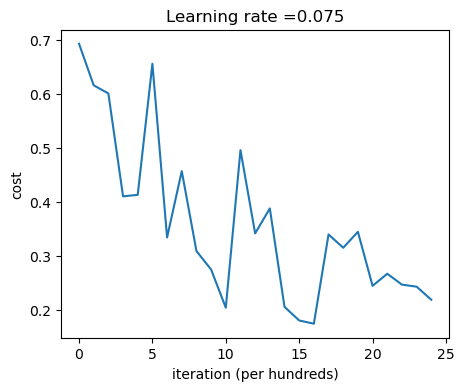

In [33]:
parameters = two_layer_model(train_x, train_y, layers_dims = (n_x, n_h, n_y), num_iteration = 2500, print_cost = True)

Hurrah! we build vectorize implementation otherwise it might have taken 10 times longer to train this.

Now we can use the trained parameters to classify images from the dataset. To see our predictions on the training and test sets 

predictions_train = predict(train_x, train_y, parameters)
predictions_train

In [36]:
predictions_test = predict(test_x,test_y,parameters)

Accuracy: 0.64


It seems that our 2-layer neural network perform good.

Let's see if we can do even better with L-layer model

# 5. L-layer Neural network


Question - Use helper functions to implement L -layer model

In [38]:
layers_dims = [12288, 20, 7, 5, 1] # 4-layer model

In [39]:
# Graded Function: L-layer Model
def L_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iteration = 3000,print_cost = True):
    """
    Implement a L-layer neural network: [Linear -> Relu]* (L-1) ->Linear ->Sigmoid.

    Arguments:
    X -- data,numpy array of shape (num_px*num_px*3,number of example)
    Y -- true 'label' vector
    layers_dims -- list containing the input size and each layer  size

    Returns :
    parameters -- parameters learnt by model. They can then be used to predict.
    """
    np.random.seed(1)
    costs = []
    # Parameters initialization.
    parameters = initialize_parameters_deep(layers_dims)
    # End code here.
    # Loop (gradient descent)
    for i in range(0,num_iteration):
        # forward propagation
        AL, caches = L_model_forward(X,parameters)
        # end code here.
        # compute cost
        cost = compute_cost(AL,Y)
        # back propagation
        grads = L_model_backward(AL, Y, caches)
        # end code here.
        # update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)
        # end code here.
        # print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print('cost after iteration %i:%f'%(i,cost))
        if print_cost and i % 100 ==0:
            costs.append(cost)
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iteration (per hundred)')
    plt.title('Learning rate ='+ str(learning_rate))
    plt.show()
    return parameters

cost after iteration 0:0.771749
cost after iteration 100:0.672053
cost after iteration 200:0.648263
cost after iteration 300:0.611507
cost after iteration 400:0.567047
cost after iteration 500:0.540138
cost after iteration 600:0.527930
cost after iteration 700:0.465477
cost after iteration 800:0.369126
cost after iteration 900:0.391747
cost after iteration 1000:0.315187
cost after iteration 1100:0.272700
cost after iteration 1200:0.237419
cost after iteration 1300:0.199601
cost after iteration 1400:0.189263
cost after iteration 1500:0.161189
cost after iteration 1600:0.148214
cost after iteration 1700:0.137775
cost after iteration 1800:0.129740
cost after iteration 1900:0.121225
cost after iteration 2000:0.113821
cost after iteration 2100:0.107839
cost after iteration 2200:0.102855
cost after iteration 2300:0.100897
cost after iteration 2400:0.092878


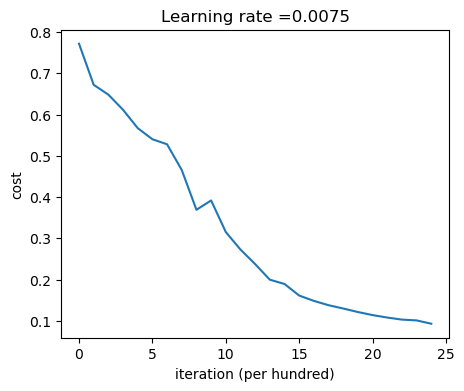

In [40]:
parameters = L_layer_model(train_x, train_y, layers_dims, num_iteration = 2500, print_cost = True)

In [41]:
pred_train = predict(train_x, train_y, parameters)

Accuracy: 0.9856459330143539


In [42]:
pred_test = predict(test_x, test_y, parameters)

Accuracy: 0.8


# 6) Result Analysis

First, let's take a look at some images the L- layer modeled labeled incorrectly . this will show a few mislabeled images


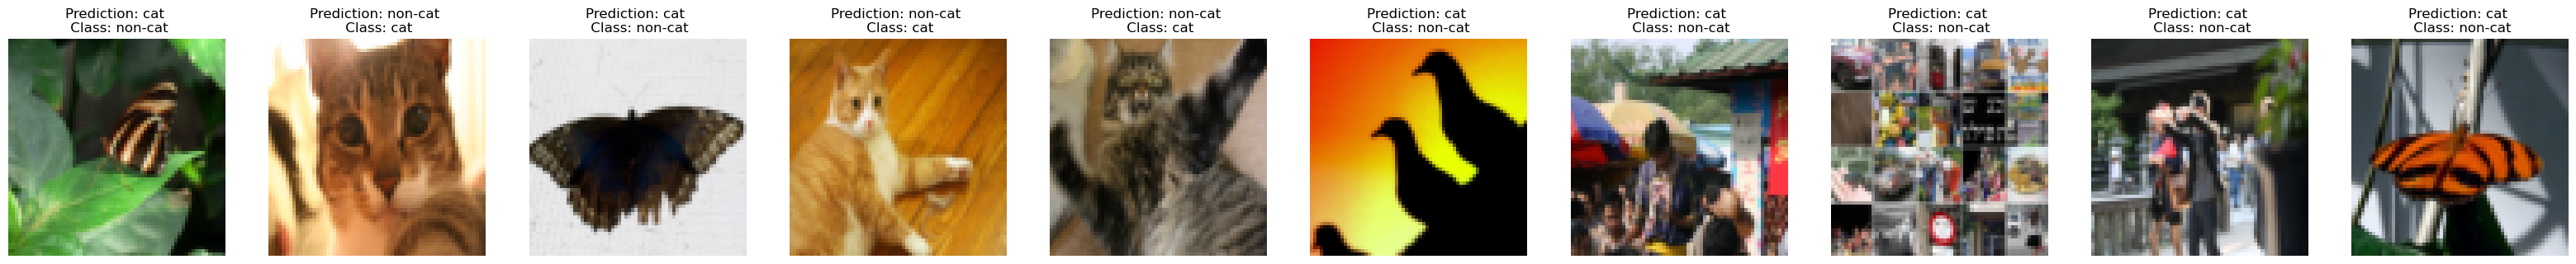

In [43]:
print_mislabeled_images(classes,test_x,test_y, pred_test)